# PRÁTICA GUIADA: Árvores de decisão

## Introdução

Neste laboratório, descobriremos como aplicar árvores de decisão em problemas de regressão e classificação. Em particular, usaremos árvores de regressão para prever o preço médio das casas em Boston e prever a aceitabilidade dos carros.

### Outros recursos

- [scikit-learn documentação de árvores de decisão](http://scikit-learn.org/stable/modules/tree.html)
- [Gini Vs Entropia](http://www.garysieling.com/blog/sklearn-gini-vs-entropy-criteria)

## 1: Construir uma árvore de regressão

#### Como o computador constrói uma árvore de regressão?

A abordagem ideal seria o computador considerar todas as partições possíveis do espaço de atributos. Contudo, isso é computacionalmente inviável, portanto, ao invés disso, é usado um algoritmo guloso (greedy) de **divisão binária recursiva: **

- Começar na raiz da árvore.
- Para cada atributo, examinar cada possível ponto de corte e escolher o atributo e o ponto de corte de forma que a árvore resultante da divisão tenha o **menor erro quadrático médio (EQM)**.
- Repetir o processo para as duas ramificações resultantes e fazer novamente uma única divisão (em cada ramificação) para minimizar o EQM.
- Repetir este processo até que um critério de parada seja cumprido.

**Como saber quando parar?**

1. Poderíamos definir um critério de parada, como **profundidade máxima** da árvore ou **o número mínimo de amostras na folha**.
2. Poderíamos também fazer a árvore grande crescer e depois "podá-la" usando algum método de poda, como "cost complexity pruning"

> Observação: O método 2 não é suportado pelo scikit-learn, então vamos usar o método 1 aqui.

**Como decidir qual divisão é a melhor?**

Uma maneira de decidir qual é a melhor divisão é calcular o ganho na redução do erro quadrático médio, se a divisão candidata for aplicável.

$$
\Delta =EQM(\text{pai}) - \sum_{j \in \text{filhos}}\frac{N_j}{N}ECM(\text{filho}_j)
$$

O objetivo é encontrar a $\Delta$ máxima, onde $EQM$ é o Erro Quadrático Médio, $N_j$ é o número de registros no nó filho $j$ e $N$ são o número de registros no nó pai.


### 1.a Fazer uma análise descritiva do conjunto de dados

O conjunto de treinamento é o velho conhecido conjunto de dados de Boston. O objetivo é prever o preço médio dos municípios.   

Instruções:

1. Ler os dados com Pandas.
- Explorar os dados ordenando-os ou representando-os graficamente.

In [1]:
#Ler os dados com Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['price'])

### 2: Construir uma árvore de regressão com scikit-learn

Como você pode imaginar, construir uma árvore à mão não é tão fácil. Agora vamos usar o scikit-learn para construir uma árvore de regressão ideal. 
Fazer o seguinte:

- Mapear a coluna `type` para uma variável binária
- Criar uma matriz `X` contendo os valores dos atributos e um vetor `y` contendo os preços
- Dividir os dados em treinamento e teste usando um `random_state`=42 e um `test_size` de 30%
- Importar e inicializar o `DecisionTreeRegressor` do scikit-learn
- Ajustá-lo ao conjunto de treinamento
- Prever os valores do conjunto de teste
- Mostrar os valores previstos e reais em um gráfico
- Usar r2_score para julgar a qualidade da regressão

In [2]:
# começamos em teste de treinamento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [3]:
# Importar o DecisionTreeRegressor, inicializá-lo e ajustá-lo ao conjunto de treinamento
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [4]:
# Prever os preços do conjunto de teste
preds = treereg.predict(X_test)

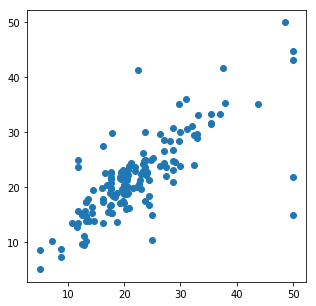

In [5]:
# Mostrar os valores previstos e reais em um gráfico
plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)

In [6]:
# Usar r2_score para julgar a qualidade da regressão
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.4243909438771395

### 2.b Parâmetros globais

O `DecisionTreeRegressor` oferece poucos parâmetros globais que podem ser alterados na inicialização. Por exemplo, podem ser estabelecidos os parâmetros `max_depth` ou `min_samples_leaf` e podem ser impostas restrições globais no espaço das soluções.

1. Usar `cross_val_score` e fazer uma validação cruzada de 3-fold para encontrar o valor ideal para` max_depth` (explorar os valores de 1 a 10). Ter em mente que `scoring='neg_mean_squared_error'` deverá ser definido como critério para o score. Sempre estabelecer `random_state=1`
- Representar o erro graficamente como função de `max_depth`

In [7]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
# Usar a validação cruzada para encontrar o melhor max_depth
from sklearn.model_selection import cross_val_score
import numpy as np

Melhor score: 5.953553190536631
Melhor depth: 4


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

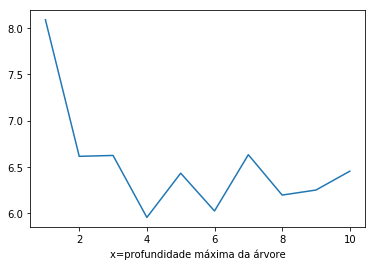

In [10]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # Selecionar o melhor comparando com o melhor até agora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # Adicionar à lista de scores para o gráfico
    all_scores.append(current_score)
    
print("Melhor score: %s" % best_score)
print("Melhor depth: %s" % best_depth)

# Representar o erro graficamente como uma função do max_depth
plt.figure()
plt.plot(range(1, 11), all_scores)
plt.xlabel('x=profundidade máxima da árvore')

# Ajustar o modelo usando a melhor max_depth
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

### 2.c Importância dos atributos

A classe DecisionTreeRegressor expõe um atributo chamado `feature_importances_`. É a contribuição para a redução da métrica de erro usada (neste caso, MSE) ao longo de toda a árvore. 

1. Comprovar a importância de cada atributo. Qual é a mais importante? De que outra forma poderíamos visualizar essa importância de maneira mais simples?

In [11]:
pd.DataFrame({'atributo':data.feature_names, 'importancia':treereg.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
5,RM,0.625648
12,LSTAT,0.219216
7,DIS,0.074465
4,NOX,0.055703
0,CRIM,0.020865
10,PTRATIO,0.004103
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
6,AGE,0.000000


### 2.d Visualização da árvore

Seguir o exemplo da [documentação](http://scikit-learn.org/stable/modules/tree.html) para visualizar a árvore.  
Pode ser necessário instalar o `pydotplus`, caso ainda não esteja instalado.

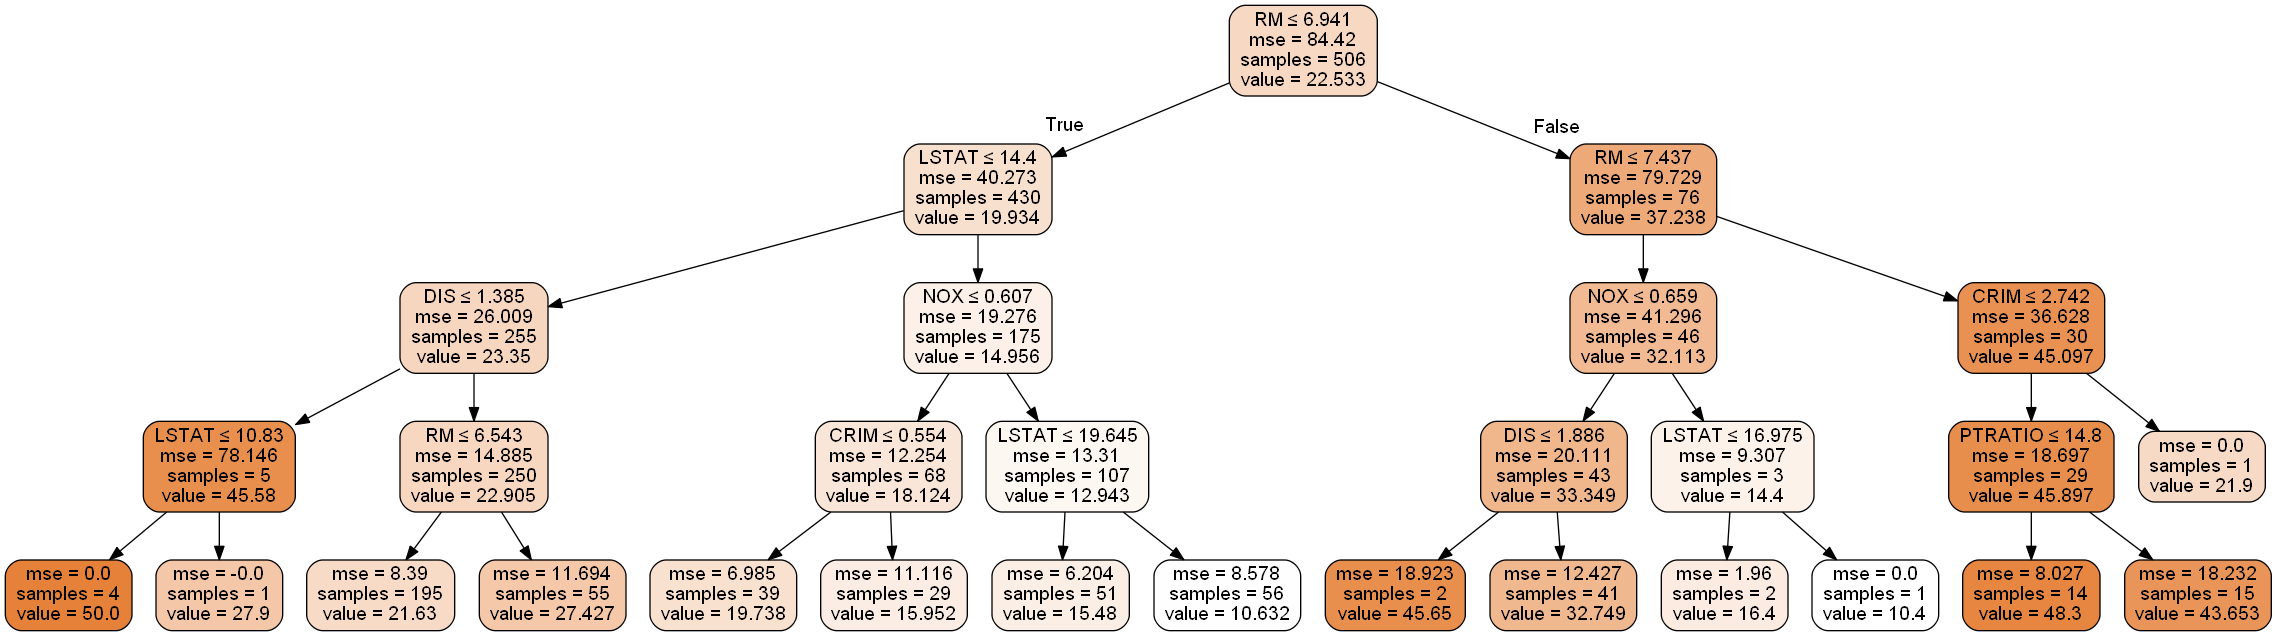

In [19]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=export_graphviz(treereg, out_file=None,  
feature_names=data.feature_names,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

#### Interpretando o diagrama de uma árvore

Como ler esta árvore de decisão?

**Nós internos:**

- `samples` é o número de observações no nó antes de ser dividido. (verificar se é a soma do valor `samples` dos seus nós filhos)
- `mse` é o erro quadrático médio calculado pela comparação dos valores de resposta observados nesse nó com o valor médio de resposta nesse nó
- A primeira linha é a condição usada para dividir esse nó (vai para a esquerda se for verdade, vai para a direita se for falso)

**Folhas:**

- `samples` é o número de observações no nó
- `value` é o valor médio de resposta nesse nó
- `mse` é o erro quadrático médio calculado pela comparação dos valores de resposta observados nesse nó com `value`

### 2.e Usar GridSearchCV para encontrar a melhor Árvore de Regressão

Como sabemos que a poda com profundidade máxima (max_depth) é o melhor modelo para nós? As árvores oferecem uma variedade de formas de pré-poda (isto é, dizemos ao computador como projetar a árvore resultante com certas restrições).

Medida | O que faz
------------------|-------------
max_depth | limita a altura da árvore (níveis-2)
max_features | limita a quantidade de atributos a serem usados em uma divisão
max_leaf_nodes | limita a quantidade máxima de nós folha que a árvore pode ter
min_samples_leaf | quantidade mínima de amostras de uma folha
min_samples_split | número mínimo de amostras para dividir um nó

1. Inicializar intervalos razoáveis para todos os parâmetros e encontrar a combinação ideal usando Grid Search.

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 4365 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:    6.8s finished


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=4,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
-40.676088855267764
6.3777808723150535


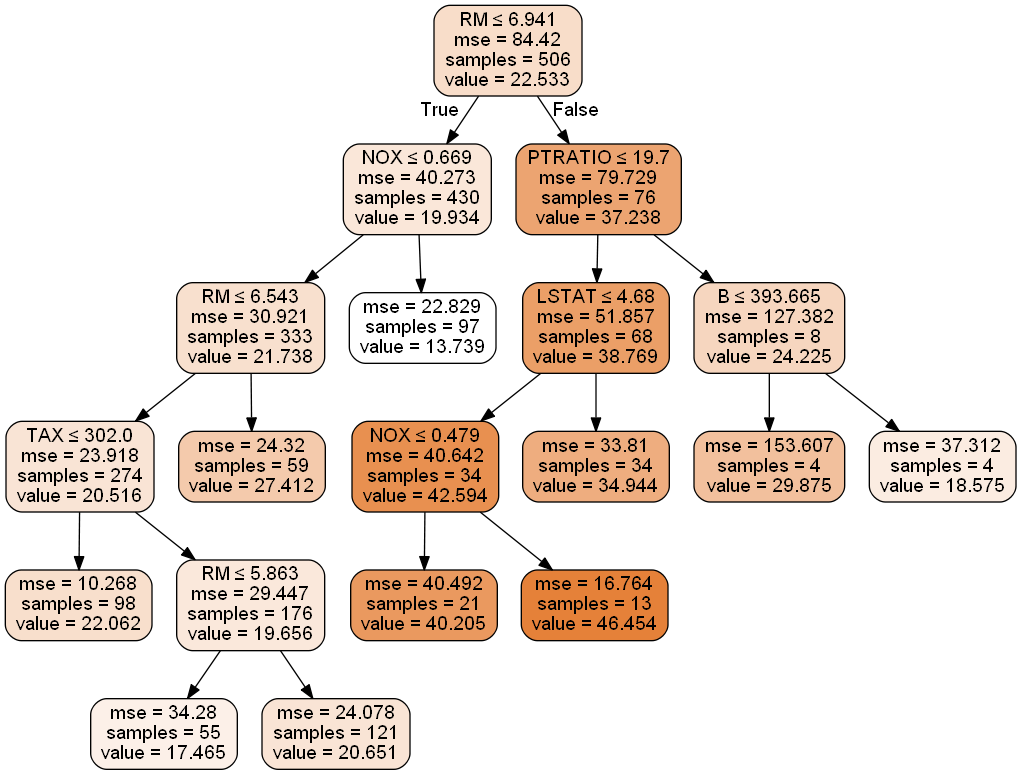

In [20]:
from sklearn.model_selection import GridSearchCV

PARÂMETROS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],'min_samples_split':[2,3,4]}
#A busca é feita com Grid Search
model = DecisionTreeRegressor(random_state=1)
gs = GridSearchCV(model, PARÂMETROS, scoring='neg_mean_squared_error', verbose=1 , n_jobs=-1)
gs.fit(X, y)

# São exibidos os melhores resultados
print(gs.best_estimator_)
print(gs.best_score_)
print(np.sqrt(-gs.best_score_))

# A melhor árvore é representada graficamente
dot_data=export_graphviz(gs.best_estimator_, out_file=None,  
feature_names=X.columns,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

## 3 Árvores de Classificação

As árvores de classificação são muito semelhantes às árvores de regressão. Aqui está uma comparação rápida:

| árvores de regressão | árvores de classificação |
|---|---|
| preveem respostas contínuas | preveem respostas categóricas |
| Prevê usando a resposta média em cada folha | prevê usando a classe mais comum em cada folha |
| São escolhidas as divisões para minimizar o EQM | São escolhidas as divisões para minimizar um critério diferente (discutido posteriormente) |



### 3.a Construindo uma árvore de classificação com scikit-learn
Vamos construir uma árvore de classificação usando o conjunto de dados de carros.

- Ler os dados com Pandas.
- Conferir se há valores vazios
- Codificar todos os atributos categóricos como booleanos usando `pd.get_dummies`
- Codificar as tags usando `LabelEncoder`
- Dividir X e y com train_test_split assim:
        train_test_split(X, y, test_size=0.3, random_state=42)
- Ajustar uma árvore de classificação com `max_depth = 3`
- Visualizar a árvore usando graphviz
- Calcular a importância dos atributos
- Calcular e mostrar a matriz de confusão
- Remover a restrição de `max_depth = 3` e ver se a classificação melhora

In [22]:
df = pd.read_csv('cars.csv')
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [23]:
# Pesquisar se há valores vazios
df.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null object
maint            1728 non-null object
doors            1728 non-null object
persons          1728 non-null object
lug_boot         1728 non-null object
safety           1728 non-null object
acceptability    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [25]:
# Codificar todos os atributos categóricos como booleanos usando pd.get_dummies
X = pd.get_dummies(df.drop('acceptability', axis=1))
atributos = X.columns

# Codificar as tags usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['acceptability'])

# Dividir X e y com train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Ajustar uma árvore de classificação com max_depth = 3
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

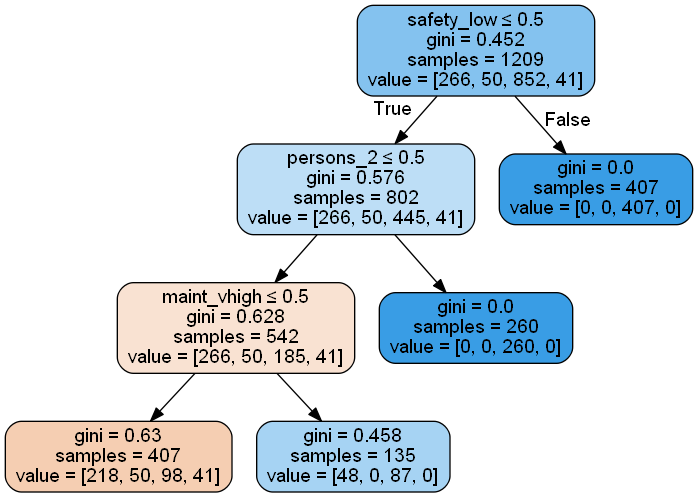

In [29]:
# Visualizar a árvore usando graphviz
dot_data = export_graphviz(treeclf, out_file=None,  
feature_names=atributos,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [30]:
# Calcular a importância dos atributos
pd.DataFrame({'Atributo':atributos,
'importancia':treeclf.feature_importances_}).sort_values('importancia',ascending=False).head()

,Atributo,importancia
12,persons_2,0.530079
19,safety_low,0.371993
7,maint_vhigh,0.097928
0,buying_high,0.000000
11,doors_5more,0.000000


In [31]:
# Calcular e mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, treeclf.predict(X_test))
predicted_cols = ['pred_'+c for c in le.classes_]
pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

,pred_acc,pred_good,pred_unacc,pred_vgood
acc,94,0,24,0
good,19,0,0,0
unacc,32,0,326,0
vgood,24,0,0,0


In [32]:
# Remover a restrição de max_depth = 3 e ver se a classificação melhora
treeclf = DecisionTreeClassifier(random_state=1)
treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
predicted_cols = ['pred_'+c for c in le.classes_]
pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

,pred_acc,pred_good,pred_unacc,pred_vgood
acc,105,4,6,3
good,1,17,0,1
unacc,3,0,355,0
vgood,3,2,0,19


## Extra

Visualizar a última árvore. É possível interpretá-la? O que isso mostra sobre a interpretação da árvore de decisão?

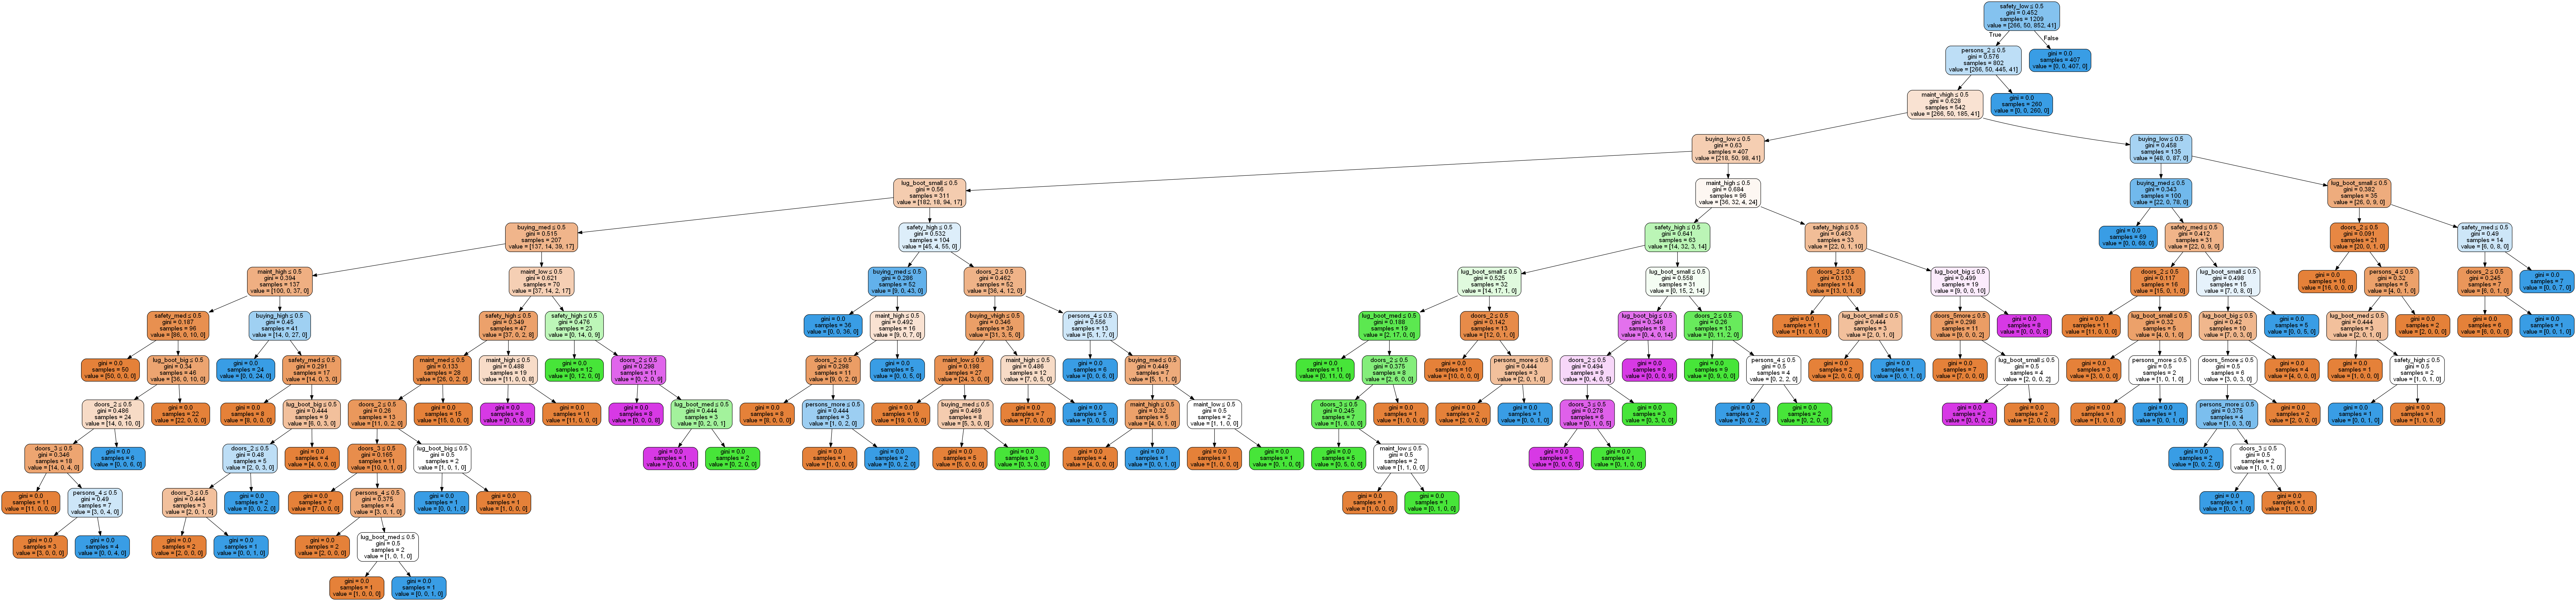

In [33]:
dot_data = export_graphviz(treeclf, out_file=None,
feature_names=atributos,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())